<a href="https://colab.research.google.com/github/shaiksuhail-824/house-price-predition-linear-ridge-lasso/blob/main/House_Price_Prediction_Linear_Ridge_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Introduction && Objectives

House price prediction is a real-world regression problem in machine learning.In this project,a linear regression is built to predict the house sale prices by using selected numerical features.The model performance is evaluated using standard regression metrics.


## 2. Dataset Overview

The dataset used is **Housing Prices - Advanced Regression Techniques**.It contains housing features along with target varible `SalesPrice`.The dataset is obtained from Kaggle and consists of multiple rows and columns describing different properties.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

In [53]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Exploratory Dataset Analysis (EDA)

EDA is performed to understand the relationship between the target variable and features.Identify missing values and features.Understanding of distribution of data.

## Analyze Missing Values

Calculate and display the percentage of missing values for all columns in the dataset to identify feature that require imputation or removal.

In [55]:
missing_percentages = (df.isnull().sum() / len(df)) * 100
missing_percentages = missing_percentages[missing_percentages > 0].sort_values(ascending=False)
print("Percentage of missing values per column:\n")
print(missing_percentages)

Percentage of missing values per column:

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


## Target Variable DIstribution ANalysis:

Visualize the distribution of the target variable 'SalePrice' using a histogram and Q-Q plot to check for normality and skewness.Additionally,display descriptive statiscs for "SalePrice' to understand its central tendency,spread,and shape.


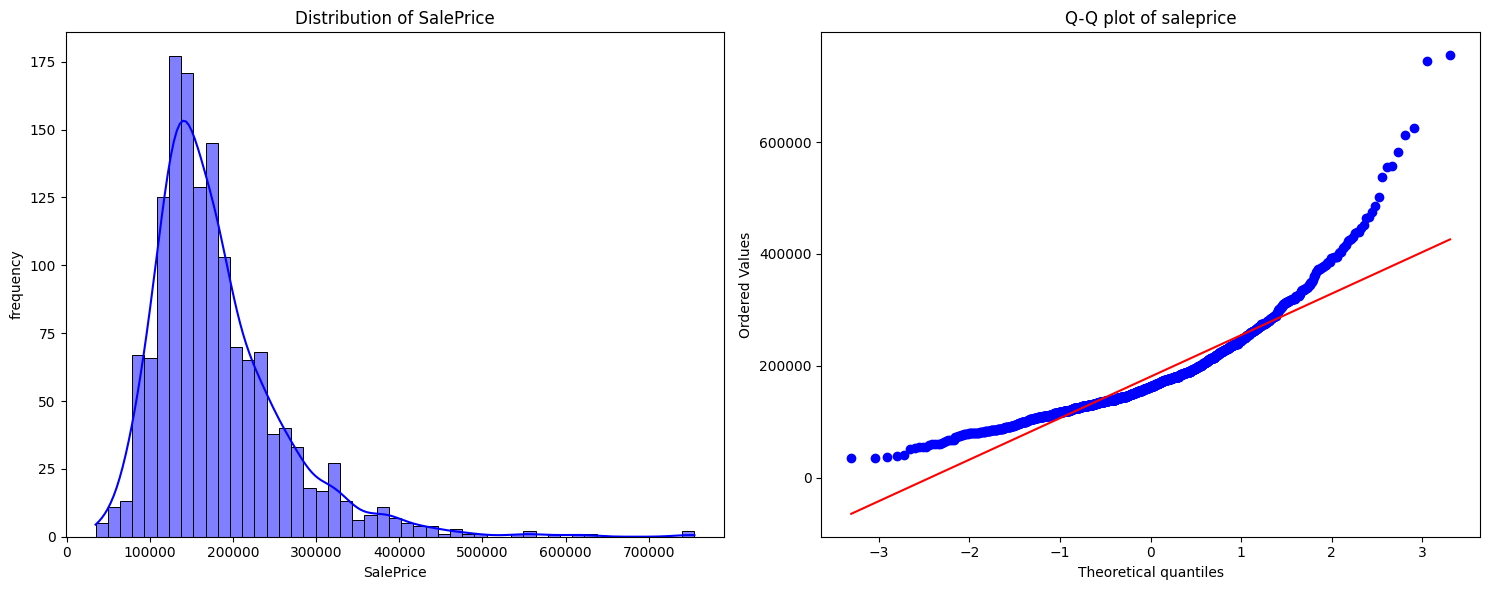

Descriptive statistics for SalePrice
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [56]:
from scipy.stats import probplot

plt.figure(figsize = (15,6))

#Histogram SalePrice
plt.subplot(1,2,1)
sns.histplot(df["SalePrice"],kde = True,color = 'blue')
plt.xlabel("SalePrice")
plt.ylabel("frequency")
plt.title("Distribution of SalePrice")

#Q-Q plot of salePrice
plt.subplot(1,2,2)
probplot(df["SalePrice"],dist = "norm",plot = plt)
plt.title("Q-Q plot of saleprice")

plt.tight_layout()
plt.show()

#Descriptive statistics for SalePrice
print("Descriptive statistics for SalePrice")
print(df["SalePrice"].describe())


## Calculate Correlation Matrix

calculate the correlation matrix of all numerical features in the dataset with the target variable 'SalePrice'.

In [57]:
df_numerical = df.select_dtypes(include=[np.number])
correlations = df_numerical.corrwith(df["SalePrice"].sort_values(ascending = False))
print("Correation of numerical feature with the target varible")
print(correlations)

Correation of numerical feature with the target varible
Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold  

## Select Top Correlated Features

Identify and select the top 10 N numerical features that have highest absolute correalation with 'SalePrice'.Features with higher absolute correaltion values are more informative for prediction.

In [58]:
abs_correlations = correlations.abs().sort_values(ascending = False)
top_10_features = abs_correlations.head(10).index.tolist()
print("Absolute Correaltion of Top 10 features with SalePrice")
top_10_features

Absolute Correaltion of Top 10 features with SalePrice


['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt']

## Visualize the Top Features Correlated with SalePrice

To identify the most important predictors of house prices,the correlation between the numerical features and target varible(SalePrice) is analyzed.The features were ranked based on their absolute correlation values with SalePrice,which measure the strenght of the relationship regardless of direction.

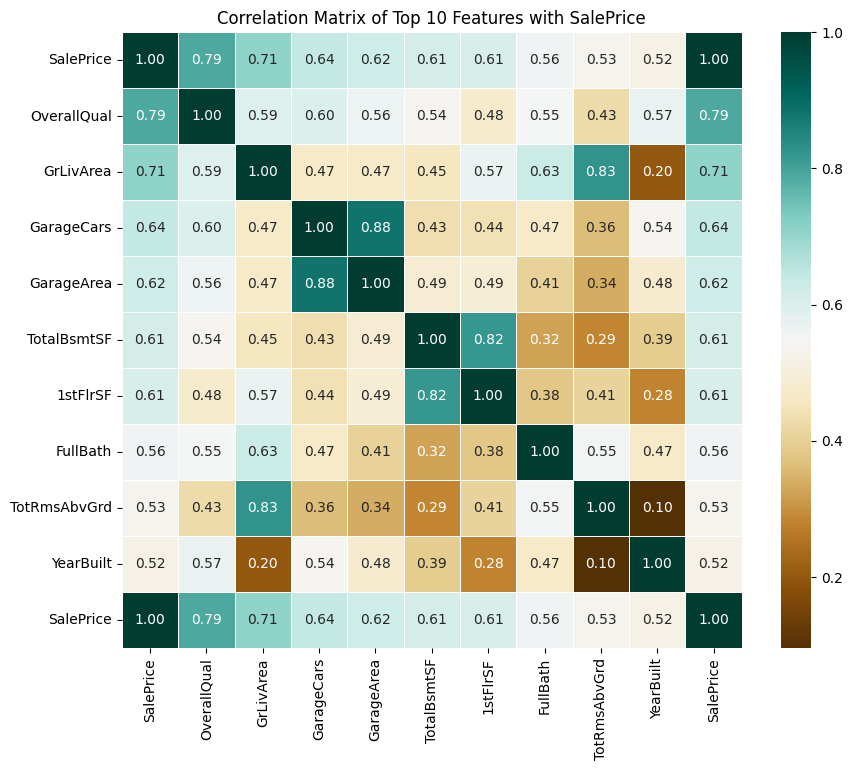

In [59]:
selected_features = top_10_features + ['SalePrice']
correlation_matrix = df[selected_features].corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix,annot = True,cmap = 'BrBG',fmt = ".2f",linewidth = .5)
plt.title('Correlation Matrix of Top 10 Features with SalePrice')
plt.show()

##Visualize Scatter plot of Top 10 Features with SalePrice


This visually represent the distribtion and trends.It helps to find the non-linearship relations and outliers.Helping to confirm the correlation


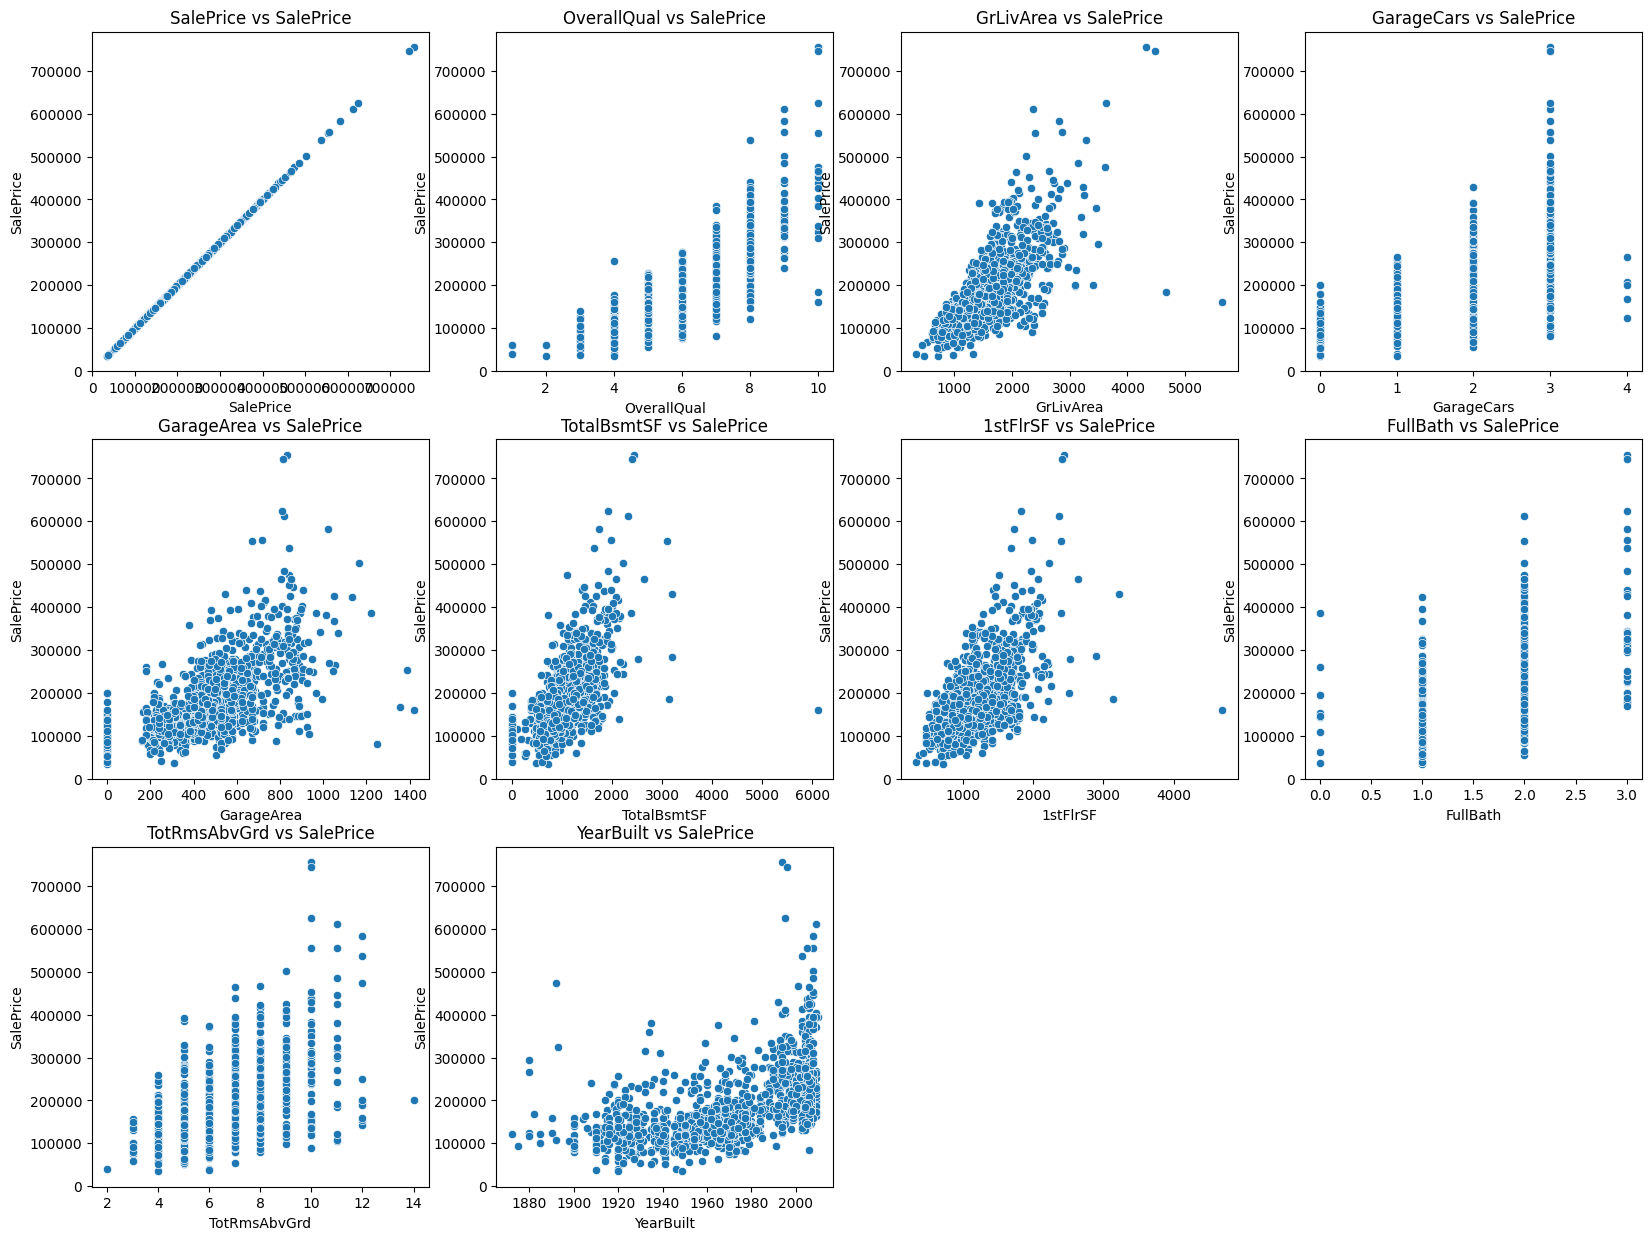

<Figure size 640x480 with 0 Axes>

In [60]:
plt.figure(figsize = (20,15))

for i,feature in enumerate(top_10_features):
            plt.subplot(3,4,i+1)
            sns.scatterplot(x = df[feature],y = df["SalePrice"],)
            plt.xlabel(feature)
            plt.ylabel("SalePrice")
            plt.title(f'{feature} vs SalePrice')
plt.show()
plt.tight_layout()

In [61]:
features = [
    'OverallQual',
    'GrLivArea',
    'TotalBsmtSF',
    'GarageCars',
    'YearBuilt'
]
X = df[features]
y = df['SalePrice'].to_numpy()

##Spliting Data into Training and Testing Sets

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {X_train.shape}")
print(f"y_test shape: {X_test.shape}")


X_train shape: (1168, 5)
X_test shape: (292, 5)
y_train shape: (1168, 5)
y_test shape: (292, 5)


In [63]:
print(X_train.columns)

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'YearBuilt'], dtype='object')


In [64]:
model = LinearRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print(y_predict)

[142114.23396224 293935.1408129  122246.69425313 179899.24654171
 288653.82881166  56767.86628421 206693.95944027 175760.99927493
  56136.01958352 128893.7471099  166390.30529211 108885.99914373
  89701.13257091 225015.3346321  195883.013448   114340.26813483
 216872.82711852 122752.4971742  124604.01105387 220342.68202096
 172748.0208351  230357.45642296 182299.38347469 109947.42955679
 216178.08115204 176681.40024416 211955.53204861  97778.92837848
 190788.33113215 212529.71013644 114393.42545762 251620.85650723
 213376.87235654  90741.71847335 268802.44523529 148018.27668056
 162199.14368002 226886.89964582 300614.19011235  83569.76202627
 147204.38009947 235488.87049359 115724.73148984 299879.13973696
 130528.38974413 170339.75758818 110694.61348319 114515.99033736
 344944.95326922 137706.78959882 109068.07999684 198923.07074281
 117182.40926074 304307.28813787 154121.09003121 240548.68256814
 213545.67746398 145819.32988871 162996.1954186   80569.2996106
  49536.2895389  133889.48

## Visualization of Actual and Predicted SalePrice

This visualize the relationship between the actual Saleprice and Predicted SalePrice.Deviation from this line represent prediction errors.The diagnol red line indicating actual and predicted values are identical.

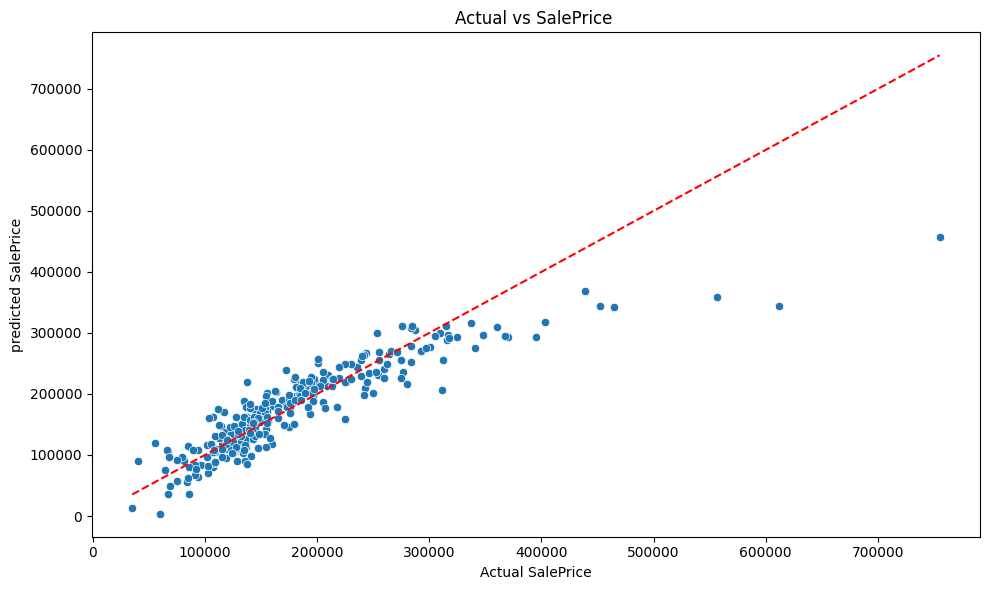

In [65]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test,y = y_predict)
plt.xlabel("Actual SalePrice")
plt.ylabel("predicted SalePrice")
plt.title("Actual vs SalePrice ")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red',linestyle = '--')

plt.tight_layout()
plt.show()

## Model Evaluation

Evaluate the performance of the Linear Regression model using standard regression metirces:Mean Absolute Erroe (MAE) , Mean Squared Error(MSE) ,Root Mean Squared Error (RSME) , and R- Squared.

In [66]:
#calculate evaluation metrics
mae = mean_absolute_error(y_test,y_predict)
mse = mean_squared_error(y_test,y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_predict)

print(f"Mean_Absolute_Error: {mae:.2f}")
print(f"Mean_Squared_Error: {mse:.2f}")
print(f"rmse: {rmse:.2f}")
print(f"r2_score: {r2:.2f}")

Mean_Absolute_Error: 25414.73
Mean_Squared_Error: 1581119650.39
rmse: 39763.30
r2_score: 0.79


## Train and Evaluate Ridge Regression

Ridge regression is a regularization technique that reduces the magnitude of model coefficient by adding a penalty term.

This helps to control overfitting and improves the stability of the model.By shrinking the coefficients, Ridge regression allows the model to generalize better to unseen data while retaining all features.

Ridge Regression Model Evaluation:
Mean_Absolute_Error (MAE):25411.61
Mean_Squared_Error (MSE):1581034882.06
Root Mean Squared Error (RMSE):39762.23
R-Squared (R2) Score:0.79


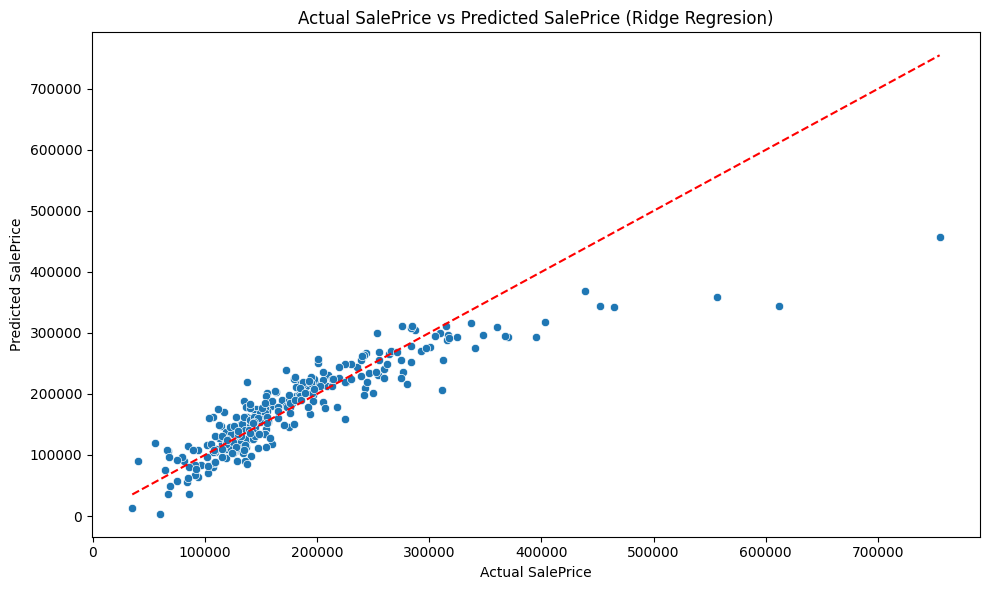

In [73]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)

y_predict_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test,y_predict_ridge)
mse_ridge = mean_squared_error(y_test,y_predict_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test,y_predict_ridge)

print("Ridge Regression Model Evaluation:")
print(f"Mean_Absolute_Error (MAE):{mae_ridge:.2f}")
print(f"Mean_Squared_Error (MSE):{mse_ridge:.2f}")
print(f"Root Mean Squared Error (RMSE):{rmse_ridge :.2f}")
print(f"R-Squared (R2) Score:{r2_ridge:.2f}")

plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test,y = y_predict_lasso)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual SalePrice vs Predicted SalePrice (Ridge Regresion)")
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],color = 'red',linestyle = '--')
plt.tight_layout()
plt.show()


## Train and Evaluate Lasso Regression

Lasso regression is a regularization technique that reduce the magnitude model coefficient by adding penalty term.It perform automatic feature selection by shrinking some coefficient to zero.This helps prevent overfitting and improve model stability by retaining only the most important features.

Lasso Regression Model Evaluation:
Mean Absolute Error (MAE): 25414.50
Mean Squared Error (MSE): 1581112790.25
Root Mean Squared Error (RMSE): 39763.21
R-squared (R2) Score: 0.79


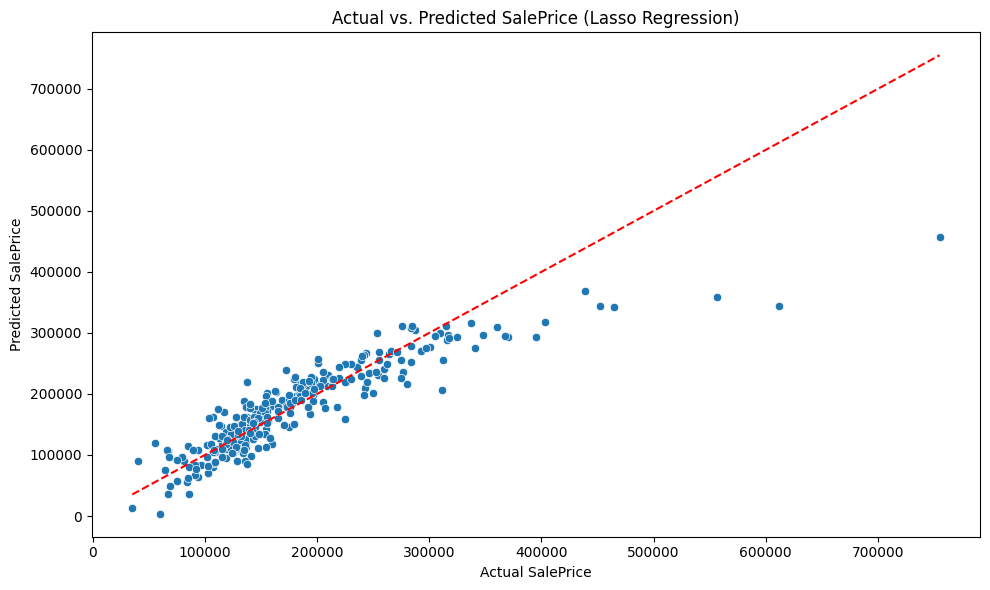

In [70]:
lasso_model = Lasso(random_state=42)
lasso_model.fit(X_train, y_train)

y_predict_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_predict_lasso)
mse_lasso = mean_squared_error(y_test, y_predict_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_predict_lasso)

print("Lasso Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso:.2f}")
print(f"R-squared (R2) Score: {r2_lasso:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_predict_lasso)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice (Lasso Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.tight_layout()
plt.show()

## Compare Model Performance

The performance of Linear Regression,Ridge Regression, and Lasso Regression was compared using MAE,RMSE, and R2 score. All three model showed comparable performance on the test data.Ridge Regression provide more stable coefficient, While Lasso regression performed feature by reducing some coeffieciets to zero.This indicates that the baseline Linear Regression model already generalized well, and regularization mainly improved robustness rather than accuracy.

To determine the best-performing model,compare the evaluation metrics for Linear Regression, Ridge, and Lasso models:

| Model             | MAE       | MSE           | RMSE      | R2 Score |
| :---------------- | :-------- | :------------ | :-------- | :------- |
| Linear Regression | 25414.73  | 1581119650.39 | 39763.30  | 0.79     |
| Ridge Regression  | 25411.61  | 1581034882.06 | 39762.23  | 0.79     |
| Lasso Regression  | 25414.50  | 1581112790.25 | 39763.21  | 0.79     |